In [1]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
f = 1.0 # Frequency of the sine wave
f_s = 10 # Sampling rate, the number of sampled data points per second
t_max = 1 # the signal ends at time t_max
t = np.linspace(0, t_max, t_max*f_s) # an array of timepoints in the time intervel [0, t_max]
x = np.sin(2*np.pi*f*t) # a discrete signal: an array of data points sampled at the timepoints in t

print('t.shape', t.shape)
print('x.shape', x.shape)

t.shape (10,)
x.shape (10,)


In [3]:
t

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [4]:
x

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

Text(0.5, 1.0, 'Signal x is sampled from sin(2*3.14*f*t), f = 1Hz, f_s = 10Hz')

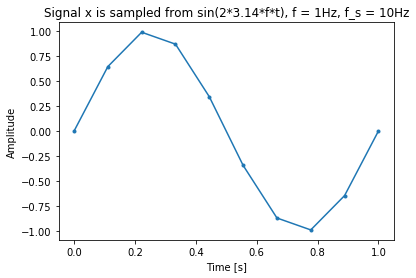

In [5]:
fig, ax = plt.subplots()
ax.plot(t, x, '.-')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.set_title('Signal x is sampled from sin(2*3.14*f*t), f = 1Hz, f_s = 10Hz')

We will use the function interp1d in the module scipy.interpolate to get signal values at more timepoints

In [6]:
from scipy.interpolate import interp1d
x1_itp = interp1d(t, x) # x1_itp is a function which takes timepoints as input

In [7]:
x1_itp([0, 0.0001, 0.0002])

array([0.        , 0.00057851, 0.00115702])

Text(0.5, 1.0, 'Reconstructed Signal x1 using interp1d')

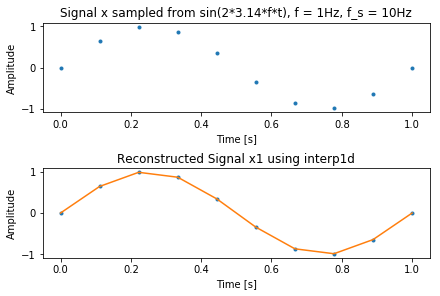

In [8]:
t1 = np.linspace(0, t_max, 100) # an array of 100 timepoints in the time intervel [0, t_max]
x1_itp = interp1d(t, x, kind = 'linear') # create an interpolation function x1_itp
#x1_itp = interp1d(t, x, kind = 'cubic')
x1 = x1_itp(t1) # interpolate signal values at the timepoints in t1
#plot t~x and t1~x1
fig, ax = plt.subplots(2,1,constrained_layout=True)
ax[0].plot(t, x, '.'); 
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Signal x sampled from sin(2*3.14*f*t), f = 1Hz, f_s = 10Hz')
ax[1].plot(t, x, '.'); 
ax[1].plot(t1, x1, '-') # b~blue
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Reconstructed Signal x1 using interp1d')

Now, we use a very low sampling rate: 2Hz, i.e., 2 data points per second

t.shape (20,)
x.shape (20,)


Text(0.5, 1.0, 'Signal x sampled from sin(2*3.14*f*t), f = 1Hz, f_s = 2Hz')

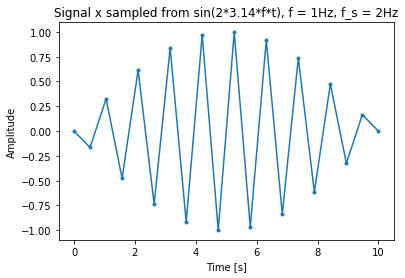

In [9]:
f = 1.0 # Frequency of the sine wave
f_s = 2 # Sampling rate, or number of measurements per second
t_max = 10
t = np.linspace(0, t_max, t_max*f_s) # an array of timepoints in the time intervel [0, t_max]
x = np.sin(2*np.pi*f*t) # the signal: an array of data points sampled at the timepoints in t

print('t.shape', t.shape)
print('x.shape', x.shape)

fig, ax = plt.subplots()
ax.plot(t, x, '.-')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.set_title('Signal x sampled from sin(2*3.14*f*t), f = 1Hz, f_s = 2Hz')

Text(0.5, 1.0, 'Reconstructed Signal x1 using cubic')

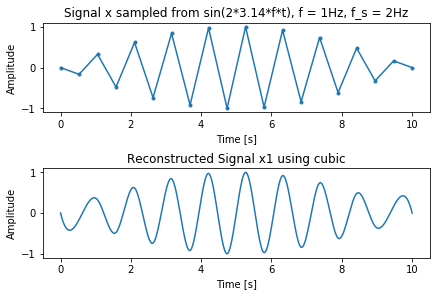

In [10]:
t1 = np.linspace(0, t_max, 1000) # an array of 1000 timepoints in the time intervel [0, t_max]
x1_itp = interp1d(t, x, kind = 'cubic')
x1 = x1_itp(t1) # interpolate signal values at the timepoints in t1
#plot t~x and t1~x1
fig, ax = plt.subplots(2,1,constrained_layout=True)
ax[0].plot(t, x, '.-'); ax[0].set_xlabel('Time [s]'); ax[0].set_ylabel('Amplitude')
ax[0].set_title('Signal x sampled from sin(2*3.14*f*t), f = 1Hz, f_s = 2Hz')
ax[1].plot(t1, x1, '-'); ax[1].set_xlabel('Time [s]'); ax[1].set_ylabel('Amplitude')
ax[1].set_title('Reconstructed Signal x1 using cubic')

In [11]:
def sinc_interp(x, tx, ty):
    """
    x is a signal sampled at the timepoints in tx 
    Output y is sampled at the timepoints in ty 
    
    """
    T = tx[1] - tx[0] # the sampling period        
    temp=np.tile(ty, (len(tx),1)) - tx.reshape(len(tx),1)    
    y = np.dot(x, np.sinc(temp/T))
    return y

Text(0.5, 1.0, 'Reconstructed Signal x2 using sinc interpolation')

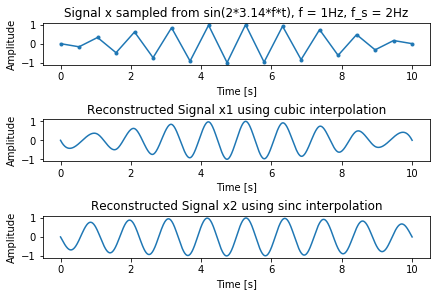

In [12]:
t2 = np.linspace(0, t_max, 1000) # an array of 1000 timepoints in the time intervel [0, t_max]
x2 = sinc_interp(x, t, t2)
fig, ax = plt.subplots(3,1,constrained_layout=True)
ax[0].plot(t, x, '.-')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Signal x sampled from sin(2*3.14*f*t), f = 1Hz, f_s = 2Hz')

ax[1].plot(t1, x1, '-')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Reconstructed Signal x1 using cubic interpolation')

ax[2].plot(t2, x2, '-')
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Amplitude')
ax[2].set_title('Reconstructed Signal x2 using sinc interpolation')